# **Logistic Regression Implementation**

(2, 2000)
(1, 2000)


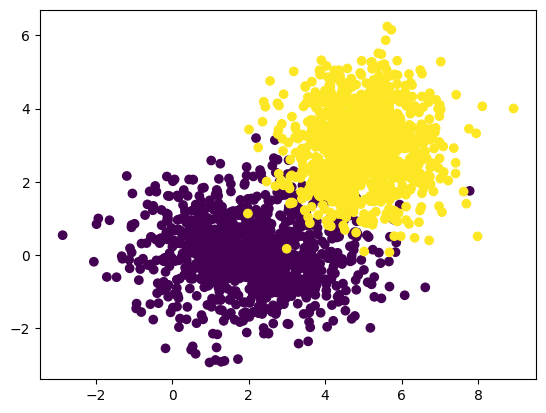

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x1 = np.random.randn(1000) * 1.5 + 2
x2 = np.random.randn(1000)

x3 = np.random.randn(1000) + 5
x4 = np.random.randn(1000) + 3

X = np.concatenate([[x1,x2] , [x3,x4]], axis = 1)

Y = np.hstack([np.zeros(1000), np.ones(1000)]).reshape(1, -1)

m = X.shape[1]

print(X.shape)
print(Y.shape)

# Data Visualization
plt.scatter(X[0,:], X[1,:], c = Y);

w = [[-0.02704392 -0.00629885]]
b = [[0.]]
A = [[0.46909229 0.4777097  0.48958796 ... 0.44815115 0.45994654 0.46960454]]
cost = 0.7196934175168157
dW = [[-0.86515553 -0.78871775]]
db = [[-0.02614264]]
w = [[-0.01839236  0.00158833]]
b = [[0.00026143]]
Cost after iteration 0: 0.692179
Cost after iteration 100: 0.493591
Cost after iteration 200: 0.434901
Cost after iteration 300: 0.397007
Cost after iteration 400: 0.370019
Cost after iteration 500: 0.349346
Cost after iteration 600: 0.332659
Cost after iteration 700: 0.318673
Cost after iteration 800: 0.306625
Cost after iteration 900: 0.296036


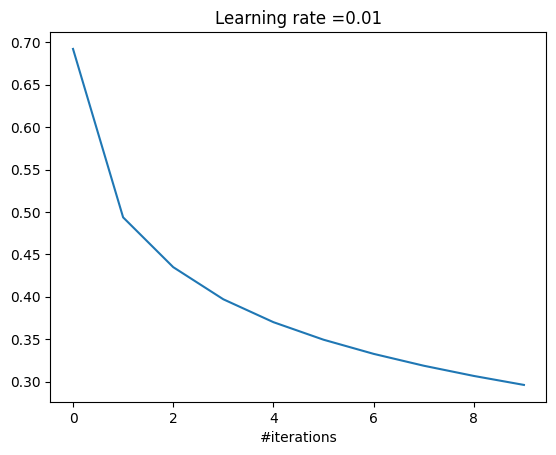

In [3]:
# Parameter Init
def parameter_initialization(x):
    w = np.random.randn(1, X.shape[0]) * 0.01
    b = np.zeros((1,1))
    return w, b

w, b = parameter_initialization(X)

print('w = ' + str(w))
print('b = ' + str(b))

# Activation Function

def segmoid(Z):
    S = 1 / (1 + np.exp(-Z))
    return S

# Forward Propagation

def forward_propagation(X, w, b):
    Z = np.dot(w, X) + b
    A = segmoid(Z)
    return A

A = forward_propagation(X, w, b)
print('A = ' + str(A))

# Cost Computation

def compute_cost(A, Y):
    cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    return cost

cost = compute_cost(A, Y)
print('cost = ' + str(cost))

# Backward Propagation

def back_propagation(A, Y):
    dZ = A - Y
    dw = 1 / m * np.dot(dZ, X.T)
    db = 1 / m * np.sum(dZ, axis=1, keepdims=True)
    return dw, db

dW, db = back_propagation(A, Y)
print('dW = ' + str(dW))
print('db = ' + str(db))

# Parameter Update

def parameter_update(w, b, dW, db, alpha=0.01):
    w = w - alpha * dW
    b = b - alpha * db
    return w, b

w, b = parameter_update(w, b, dW, db)
print('w = ' + str(w))
print('b = ' + str(b))

# Logistic Regression Model

def logistic_regression(X, Y, alpha=0.01, num_iter=1000, print_cost=False):
    costs = []
    w, b = parameter_initialization(X)

    for i in range(0, num_iter):
        A = forward_propagation(X, w, b)
        cost = compute_cost(A, Y)
        dw, db = back_propagation(A, Y)
        w, b = parameter_update(w, b, dw, db, alpha=0.01)

        if print_cost and i % 100 == 0:
            print('Cost after iteration %i: %f' % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.xlabel("#iterations")
    plt.title("Learning rate =" + str(alpha))
    plt.show()

    return w, b

w, b = logistic_regression(X, Y, alpha=0.01, num_iter=1000, print_cost=True)


In [4]:
# Prediction

def predict(X, w, b):
    A = forward_propagation(X, w, b)
    prediction = A > 0.5
    return prediction

prediction = predict(X, w, b)
np.mean(prediction == Y)

0.902